# Analysis of stocks as per user input for given companies and time period

In [2]:
# this is important
%matplotlib inline

In [3]:
#Ishan- Importing the required packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Taking input for number of stocks to analyze and creating list of tickers for those Stocks

In [4]:
#Saad- taking user input for ticker symbol and no. of stocks instead of hard coding
def get_tick_input():
    try:
        n = int(input("Number of stocks you want to analyze:"))
        global ticker_list
        ticker_list = list()
        for i in range(n):
            tick = input("Input your stock ticker symbol: ")
            ticker_list.append(tick.upper())
        return ticker_list
    
    except ValueError:
        print('Please enter integer for number of stocks')

get_tick_input()

Number of stocks you want to analyze:4
Input your stock ticker symbol: AAPL
Input your stock ticker symbol: AXP
Input your stock ticker symbol: GS
Input your stock ticker symbol: MS


['AAPL', 'AXP', 'GS', 'MS']

# Taking input for start date and end date of analysis time period

In [5]:
#Saad - input for start date and end date as global variables
def get_time_period():
    global start_date
    global end_date
    start_year = int(input("Input Start Year [xxxx]:"))
    start_month = int(input("Input Start Month [1-12]:"))
    start_day = int(input("Input Start Day:"))
    end_year = int(input("Input End Year [xxxx]:"))
    end_month = int(input("Input End Month [1-12]:"))
    end_day = int(input("Input End Day:"))

    start_date = datetime.datetime(start_year, start_month, start_day)
    end_date = datetime.datetime(end_year, end_month, end_day)
get_time_period()

Input Start Year [xxxx]:2001
Input Start Month [1-12]:1
Input Start Day:1
Input End Year [xxxx]:2017
Input End Month [1-12]:12
Input End Day:31


In [6]:
#Importing the required data
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

# tickers = ['AAPL', 'MSFT', 'IBM', 'GOOGL']
tickers = ticker_list #Saad- switching from hard coded tickers to user input

# all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data = get(tickers, start_date, end_date) #Saad - switching from hard code date to user input
all_data.head()

High       Low      Open     Close       Volume  \
Ticker Date                                                              
AAPL   2001-01-02  1.089286  1.040179  1.062500  1.062500  113078000.0   
       2001-01-03  1.191964  1.031250  1.035714  1.169643  204268400.0   
       2001-01-04  1.321429  1.200893  1.295757  1.218750  184849000.0   
       2001-01-05  1.241071  1.147321  1.209821  1.169643  103089000.0   
       2001-01-08  1.213164  1.138393  1.209821  1.183036   93424800.0   

                   Adj Close  
Ticker Date                   
AAPL   2001-01-02   0.711517  
       2001-01-03   0.783266  
       2001-01-04   0.816152  
       2001-01-05   0.783266  
       2001-01-08   0.792235

# Plotting histogram of daily percentage change for each input stock

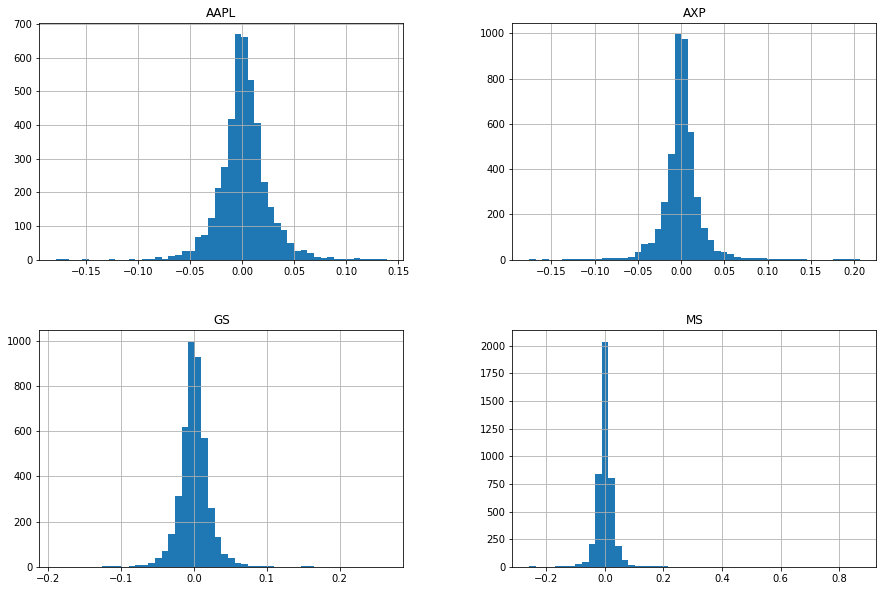

In [7]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
# print(daily_close_px.head(100))

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

daily_pct_change = daily_pct_change.iloc[1:]
# print(daily_pct_change.head(100))

# # Plot the distributions
histogram = daily_pct_change.hist(bins=50,figsize=(15,10))
# plt.xlabel("Daily % Change")
# plt.ylabel("Frequency")
plt.show()

# Plotting rolling time window for 30 days and 180 days with day to day price movement

AxesSubplot(0.125,0.2;0.775x0.68)


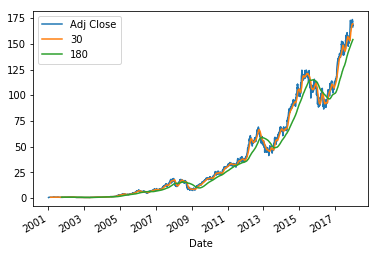

AxesSubplot(0.125,0.2;0.775x0.68)


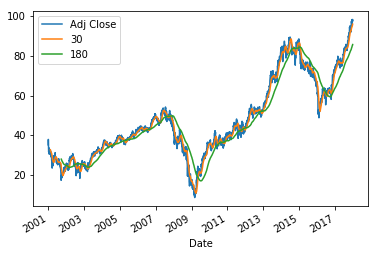

AxesSubplot(0.125,0.2;0.775x0.68)


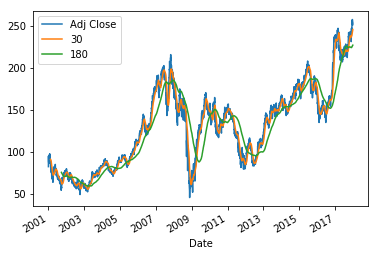

AxesSubplot(0.125,0.2;0.775x0.68)


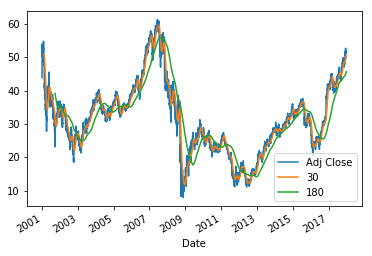

In [8]:
# Saad replacing indvidual code blocks to plot graph for each stock with one loop
for stock in ticker_list:
    ticker = pdr.get_data_yahoo(stock, 
                              start=start_date, 
                              end=end_date)

    # Isolate the adjusted closing prices 
    adj_close_px = ticker['Adj Close']
    adj_close_px = adj_close_px.dropna()

    # Short moving window rolling mean
    ticker['30'] = adj_close_px.rolling(window=30).mean()

    # Long moving window rolling mean
    ticker['180'] = adj_close_px.rolling(window=180).mean()

    # Plot the adjusted closing price, the short and long windows of rolling means
    print(ticker[['Adj Close','30', '180']].plot())

    plt.show()

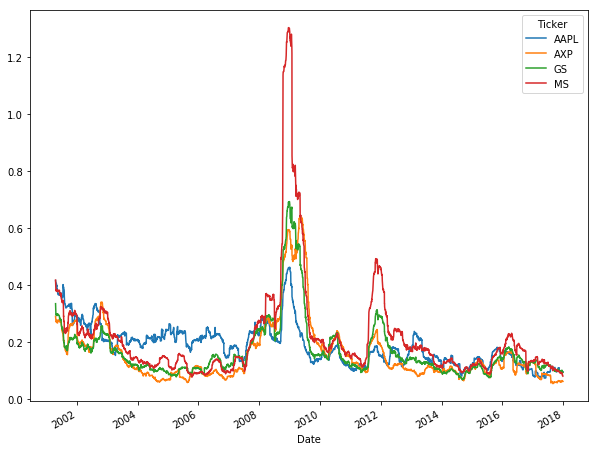

In [9]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [10]:
# visualisation
import pandas_datareader.data as web
import fix_yahoo_finance as yf


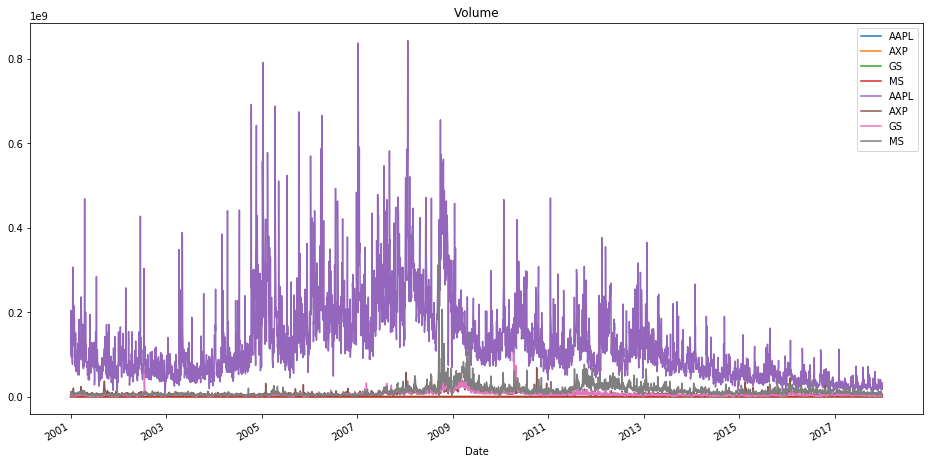

In [14]:
# Saad changed hard code to loop for any number of stocks and any tickers
start = start_date
end = end_date


df_adjclose = web.DataReader(ticker_list,'yahoo', start,end)['Adj Close']

for stock in ticker_list:
    df_adjclose[stock].plot(label = stock, figsize = (16,8), title = 'Adjusted Closing Price')
    # df_adjclose['IBM'].plot(label = 'IBM')
    # df_adjclose['MSFT'].plot(label = 'MSFT')
    # df_adjclose['FTEC'].plot(label = 'FTEC')
    plt.legend();

for stock in ticker_list:
    df_volume = web.DataReader(ticker_list,'yahoo', start,end)['Volume']
    df_volume[stock].plot(label = stock, figsize = (16,8), title = 'Volume')
    # df_volume['IBM'].plot(label = 'IBM')
    # df_volume['MSFT'].plot(label = 'MSFT')
    # df_volume['FTEC'].plot(label = 'FTEC')
    plt.legend();

# Changes made till here

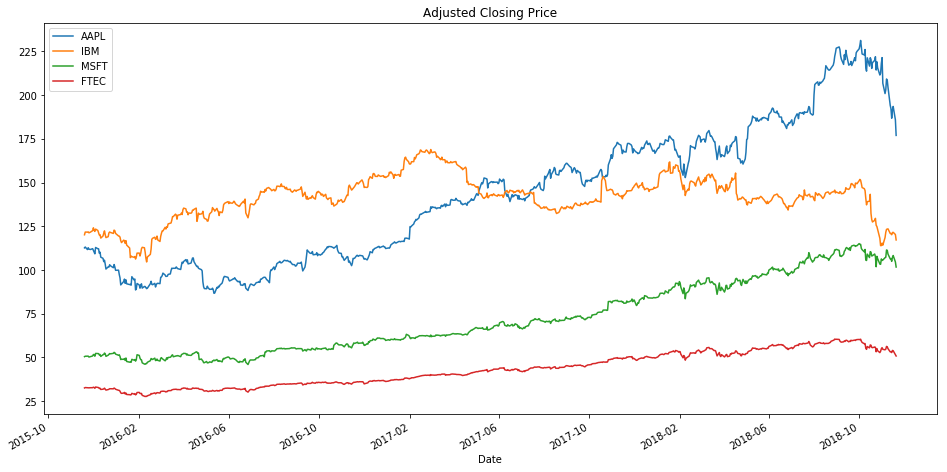

In [3]:
# Moving Average Code:

df_adjclose['AAPL'].plot(label = 'AAPL', figsize = (16,8), title = 'Adjusted Closing Price')
df_adjclose['IBM'].plot(label = 'IBM')
df_adjclose['MSFT'].plot(label = 'MSFT')
df_adjclose['FTEC'].plot(label = 'FTEC')
plt.legend();

In [ ]:
# Namha  - Basic Risk Analysis 1 - calculating the variance and std dev of a portfolio containing all stocks equally.

df_adjclose_returns = df_adjclose.pct_change()
df_adjclose_returns.head()
# Construct a covariance matrix for the portfolio's daily returns with the .cov() method
cov_matrix_d = df_adjclose_returns.cov()
# Annualise the daily covariance matrix with the standard 250 trading days
cov_matrix_a = cov_matrix_d * 250
cov_matrix_a
# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 
weights = np.array([0.25, 0.25, 0.25, 0.25])
weights

# Calculate the variance with the formula
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
print (str(round(port_variance, 4) * 100) + '%')  # Just converting the variance float into a percentage

#  The standard deviation of a portfolio is just a square root of its variance
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
print(str(round(port_volatility, 4) * 100) + '%')

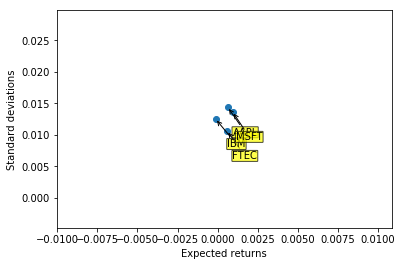

In [32]:
#Cassie - Basic Risk Analysis 2 - Standard Deviation and Expected Return for each stock
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.7),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

In [11]:
#Ishan

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Isolate the IBM returns
ibm_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'IBM']
ibm_returns.index = ibm_returns.index.droplevel('Ticker')

googl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'GOOGL']
googl_returns.index = googl_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns,ibm_returns,googl_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT','IBM','GOOGL']
return_data.head()



,AAPL,MSFT,IBM,GOOGL
Date,,,,
2006-10-03,-0.010474,0.000366,-0.002691,0.006456
2006-10-04,0.017396,0.020612,0.017603,0.028450
2006-10-05,-0.007323,-0.000716,-0.002168,-0.009402
2006-10-06,-0.008186,-0.001792,0.002650,0.020882
2006-10-09,0.005509,-0.005397,0.010291,0.020012


In [12]:
return_data.corr()

,AAPL,MSFT,IBM,GOOGL
AAPL,1.000000,0.529941,0.558959,0.626833
MSFT,0.529941,1.000000,0.611151,0.574975
IBM,0.558959,0.611151,1.000000,0.521998
GOOGL,0.626833,0.574975,0.521998,1.000000


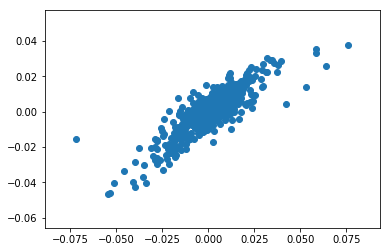

In [18]:
#Cassie The Relationship between each stock and ETF
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(rets.MSFT,rets.FTEC)

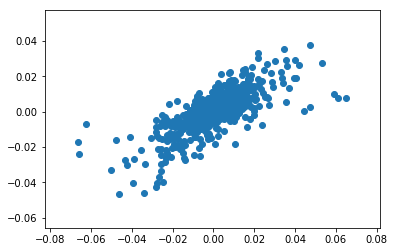

In [19]:
plt.scatter(rets.AAPL,rets.FTEC)

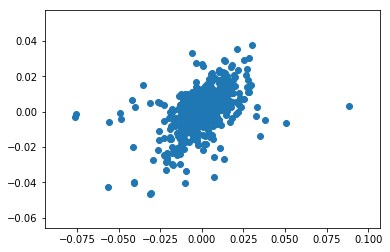

In [20]:
plt.scatter(rets.IBM,rets.FTEC)

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(return_data, test_size = 0.3)
x_train = train.iloc[0:,1:4]
y_train = train.iloc[0:,0:1]
x_test = test.iloc[0:,1:4]
y_test = test.iloc[0:,0:1]



In [14]:
#Performing Linear Regression
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
testing_predictions  = model.predict(x_test)
model.score(x_test,y_test)

0.5125795203001539

In [10]:
# Cassie - Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Linear Regression
# Here ETF_Up is a binary variable
df_['ETF_Up'] = np.where(df_[('Close', 'FTEC')]>df_[('Open', 'FTEC')],1,0)
df_.dropna()
df_ = df_[[('Close', 'AAPL'),('Close', 'IBM'),('Close', 'MSFT'),('Open', 'AAPL'),('Open', 'IBM'),('Open', 'MSFT'),'AAPL','IBM','MSFT',('Open', 'FTEC'),('Close', 'FTEC'),'FTEC','ETF_Up']]
list(df_.columns.values)


[('Close', 'AAPL'),
 ('Close', 'IBM'),
 ('Close', 'MSFT'),
 ('Open', 'AAPL'),
 ('Open', 'IBM'),
 ('Open', 'MSFT'),
 'AAPL',
 'IBM',
 'MSFT',
 ('Open', 'FTEC'),
 ('Close', 'FTEC'),
 'FTEC',
 'ETF_Up']

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_, test_size = 0.5)
x_train = train.iloc[0:,0:6]
y_train = train['ETF_Up']
x_test = test.iloc[0:,0:6]
y_test = test['ETF_Up']


from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

testing_predictions  = model.predict(x_test)
model.score(x_test,y_test)

0.27691409166412784

In [12]:
# Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Logistic Regression
# Here ETF_UP is a binary variable
# Logistic Regression a better fit than Linear Regression
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_, test_size = 0.3)
x_train = train.iloc[0:,0:6]
y_train = train['ETF_Up']
x_test = test.iloc[0:,0:6]
y_test = test['ETF_Up']

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
actuals = np.array(y_test)
model.score(x_test,actuals)

0.8377192982456141

In [13]:
# Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(10,30, 50,100), 
     'max_samples':(.30,.40,.50,1.0),
     'max_features':(1,2,4,6),
     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
inputs = df_.iloc[0:,0:6]
outputs = df_['ETF_Up']
model.fit(inputs, np.ravel(outputs))
model.best_score_, model.best_params_

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(0.5285524568393094,
 {'max_features': 1, 'max_samples': 0.5, 'n_estimators': 10})

In [14]:
rf = BaggingClassifier(max_features=6,max_samples=0.9,n_estimators=60)
rf.fit(x_train,y_train)
rf_acc = rf.score(x_test,y_test)
print(rf_acc)

0.6842105263157895


In [19]:
# Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Neutral Network

X = df_.iloc[0:,0:6].values
y = df_['ETF_Up'].values

def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot

Y=one_hot_encoder(y)



In [20]:
hidden_layers = (60,)
epochs = 500
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(60,), max_iter = epochs, random_state=1)

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [22]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((30,),(60,),(80,)),
    'max_iter': (500, 1000)
}
gs = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters,cv=5)
gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.8428005284015853
{'activation': 'tanh', 'hidden_layer_sizes': (60,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'lbfgs'}


In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import fix_yahoo_finance as yf

In [2]:
#Cassie - Regression Analysis

#First Regression Analysis - Individual Stock's Return on Industry's ETF Return (One time period percent change)
import pandas_datareader.data as web
import fix_yahoo_finance as yf
start = datetime.datetime(2015,11,19)
end = datetime.datetime(2018,11,19)
df = web.DataReader(['AAPL','IBM','MSFT','FTEC'],'yahoo', start,end)
df_ = web.DataReader(['AAPL','IBM','MSFT','FTEC'],'yahoo', start,end)[['Close','Open']]
df1 = df['Close']
df1_ = df['Adj Close']
rets = df1.pct_change()
df_ = df_.join(rets)



/Users/user/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [36]:
#Regression Table1
import numpy as np
import statsmodels.api as sm
X = rets[['MSFT','IBM','AAPL']]
X = sm.add_constant(X)
y = rets['FTEC']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTEC   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):          4.26e-311
Time:                        20:42:32   Log-Likelihood:                 3084.2
No. Observations:                 756   AIC:                            -6160.
Df Residuals:                     752   BIC:                            -6142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e-05      0.000      0.142      0.8

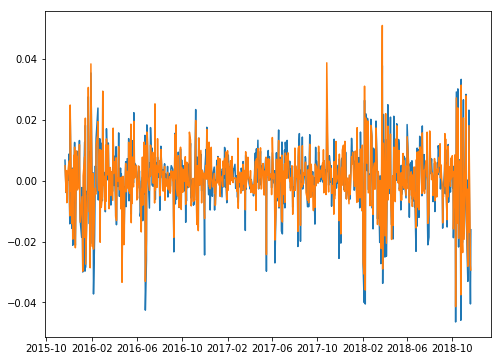

In [14]:
#Fitted Value Graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)  

In [15]:
#Regression Table2
import numpy as np
import statsmodels.api as sm
X = df1[['MSFT','IBM','AAPL']]
X = sm.add_constant(X)
y = df1['FTEC']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTEC   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Fri, 30 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:58:49   Log-Likelihood:                -1264.0
No. Observations:                 757   AIC:                             2536.
Df Residuals:                     753   BIC:                             2554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5087      0.638     -3.929      0.0

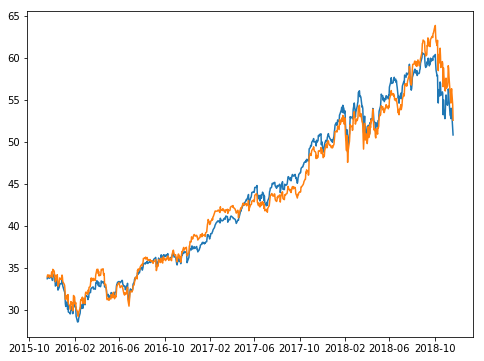

In [16]:
#Fitted Value Graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues) 

In [3]:
# Cassie - More about Time Series 
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
p = print

In [4]:
# A general function for generating four plots
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

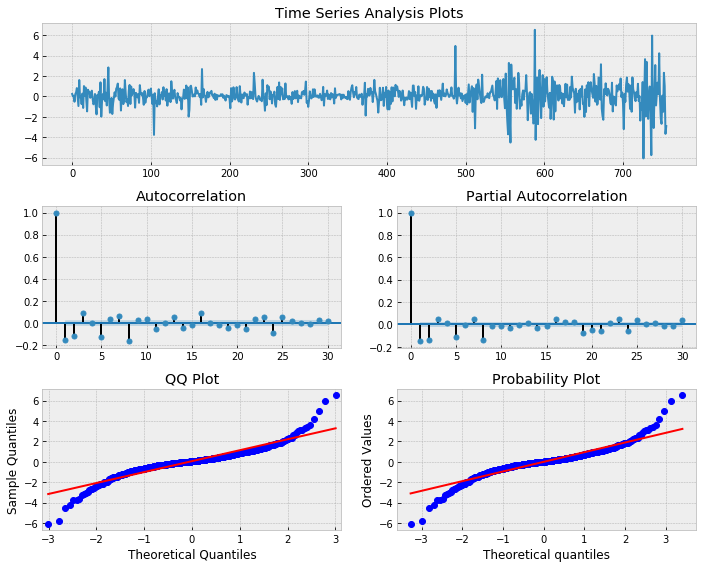

In [5]:
#First Diffference model (Microsoft - Adjusted Close Price)
#This indicates that the process is close to normality but with 'heavy tails'. (This isn't the best model for the data)
_ = tsplot(np.diff(df1_.MSFT), lags=30)

/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   MSFT   No. Observations:                  757
Model:                     ARMA(0, 7)   Log Likelihood               -2151.291
Method:                           mle   S.D. of innovations              4.115
Date:                Fri, 30 Nov 2018   AIC                           4318.583
Time:                        23:20:52   BIC                           4355.618
Sample:                             0   HQIC                          4332.847
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.MSFT     2.5385      0.038     66.024      0.000       2.463       2.614
ma.L2.MSFT     4.1604      0.068     60.849      0.000       4.026       4.294
ma.L3.MSFT     5.1616      0.090     57.563      0.0

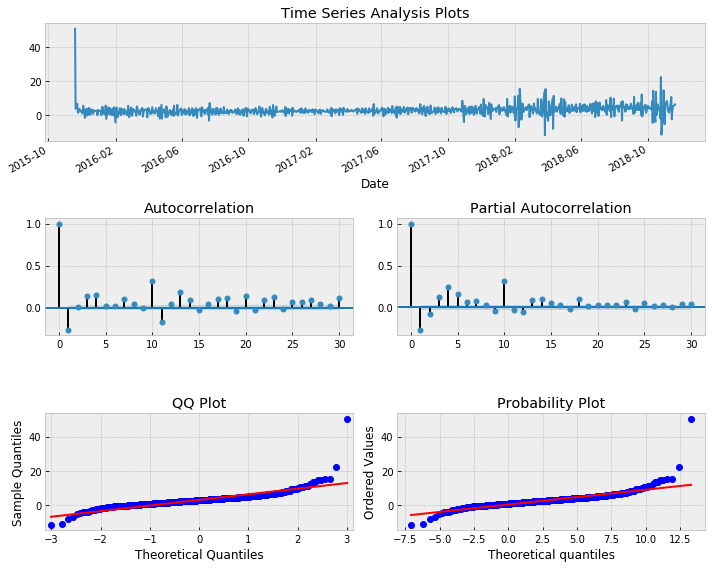

In [42]:
# Moving Average Models - MA(q)
# Data seem to be normalized (no heavy tail problem), but partial correlation still have an impact.
max_lag = 30
Y = df1_.MSFT
mdl = smt.ARMA(Y, order=(0, 7)).fit(
    maxlag=max_lag, method='mle', trend='nc')
p(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)


In [ ]:
# Namha - Trying to do the VAR model
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
 
style.use('ggplot')
data = df_adjclose['AAPL'].pct_change()

#Calculate returns
rets = data.pct_change()
rets = rets.dropna(how='any') 
rets = pd.DataFrame(rets)
rets

sorted_rets = sorted(rets["AAPL"])
sorted_rets

varg = np.percentile(sorted_rets, 5)

#Output histogram
plt.hist(sorted_rets,normed=True)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title(r'Histogram of Asset Returns', fontsize=18, fontweight='bold')
plt.axvline(x=varg, color='r', linestyle='--', label='95% Confidence VaR: ' + "{0:.2f}%".format(varg * 100))
plt.legend(loc='upper right', fontsize = 'x-small')
plt.show()  